In [121]:
# importing packages
using Plots

#numerical values

k = 180.                            # W/mK
h = 100.                            #W/m²K
R₁ = 0.005                          # m
R₂ = 0.03                           # m
δx = 0.0005                         # m
Tₚ = 100 + 273.15                   # K              
Tₑₙᵥ = 25 + 273.15                  # K
N = round(Int, ((R₂ - R₁) / δx));   # number of RK4 iterations

In [122]:
# solve ODE system for arbitrary γ₀
function solve_ODE(γ₀)

    γ = Vector{Float64}()
    θ = Vector{Float64}()
    ρ = Vector{Float64}()

    push!(γ, γ₀)
    push!(θ, Tₚ)
    push!(ρ, R₁)

    for i in 1:N
                
        k₁ = δx*(-1/ρ[i])*γ[i]
        l₁ = δx*γ[i]
        k₂ = δx*(-1/(ρ[i]+δx/2))*(γ[i]+k₁/2)
        l₂ = δx*(γ[i]+k₁/2)
        k₃ = δx*((-1/(ρ[i]+δx/2))*(γ[i]+k₁/2))
        l₃ = δx*(γ[i]+k₂/2)
        k₄ = δx*(-1/(ρ[i]+δx))*(γ[i]+k₃)
        l₄ = δx*(γ[i]+k₃)
        
        γₙ = γ[i] + (1/6)*(k₁ + 2*k₂ + 2*k₃ + k₄)
        θₙ = θ[i] + (1/6)*(l₁ + 2*l₂ + 2*l₃ + l₄)
        ρₙ = ρ[i] += δx
        
        push!(γ, γₙ)
        push!(θ, θₙ)
        push!(ρ, ρₙ)

    end
    return [θ, γ]
end

solve_ODE (generic function with 1 method)

In [123]:
function Boundary(γ₀)
    B = solve_ODE(γ₀)
    dTdr = (-h/k)*(B[1][N+1] - Tₑₙᵥ)
    B[2][N+1] - dTdr
end 

Boundary (generic function with 1 method)

In [124]:
# root finding for f by bisection method
function Bisection(f, a, b; tol=1e-5)
    mean = (a + b) / 2
    while abs(f(mean)) > tol
        if f(mean)*f(a) < 0
            b = mean
        else
            a = mean
        end
        mean = (a + b) / 2
    end
    return mean
end

Bisection (generic function with 1 method)

In [125]:
# converts theta to celsius
function T_convert(θ)
    for j in 1:N+1
        θ[1][j] -= 273.15
    end
    return θ
end

T_convert (generic function with 1 method)

In [126]:
γ₀ = Bisection(Boundary, -5000, 0)

-242.54210293293

In [127]:
Result = solve_ODE(γ₀)
Solution = T_convert(Result);

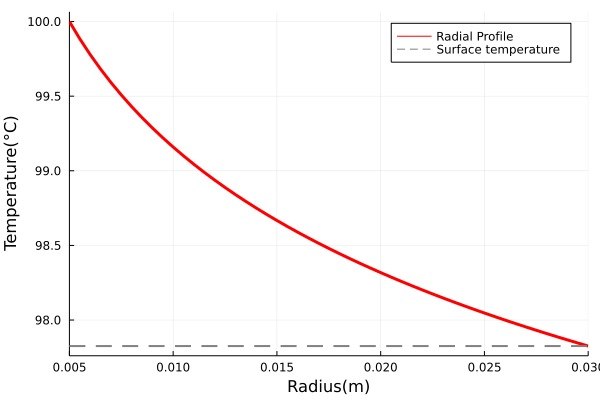

In [128]:
x_axis = [R₁: δx: N*δx + R₁]
dashline(y) = Solution[1][N+1]

xname = "Radius(m)"
yname = "Temperature(°C)"

plot(x_axis, Solution[1], xl=xname,yl=yname, c=:red, lw=:3, xlim=(R₁, R₂) , label="Radial Profile")
plot!(x_axis, dashline, c=:grey, line=(:dash, 2), label="Surface temperature")